# Objectives
- [x] Run Matlab
- [x] Plot signals in MATLAB
- [x] Understand basic MATLAB syntax and language
- [x] Use functions in MATLAB
- [x] Explore how phase affects signals
- [x] Explain the idea of Orthogonality and projection of signals

## Exercise 1: Sinusoidal signal generation

In [2]:
%%file sine_gen.m
function sig = sine_gen(amp, f, fs, T); 
    dt = 1/fs;
    t  = 0:dt:T;
    sig = amp*sin(2*pi*f*t);
end

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_1\sine_gen.m'.


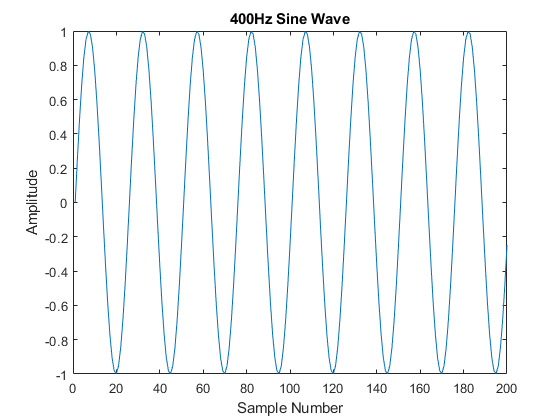

In [3]:
s1 = sine_gen(1.0,400,10000,1);
plot(s1(1:200));
xlabel('Sample Number');
ylabel('Amplitude');
title('400Hz Sine Wave');

MATLAB requires functions to be in a separate file with the function name as the file name. Do this using the `%%file` IPython magic command.
+ Remember to `end` the function

## Exercise 2: Spectrum of a signal

In [4]:
%%file plot_spec.m
function plot_spec(sig,fs);
    magnitude = abs(fft(sig));
    N = length(sig);
    df =fs/N;
    f = 0:df:fs/2;
    Y = magnitude(1:length(f));
    plot(f, 2*Y/N);
    xlabel('frequency(Hz)');
    ylabel('Magnitude');
    title('Spectrum');
end

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_1\plot_spec.m'.


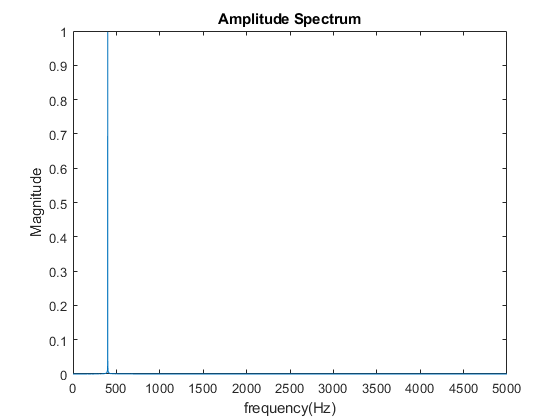

In [5]:
%plot inline
plot_spec(s1,10000);
title('Amplitude Spectrum');

fft computes the dscrete fourier transform 

## Exercise 3: Two Tones

In [6]:
s2 = sine_gen(0.5, 1000, 10000, 1.0);

In [7]:
%%file combine_signals.m
function signal = combine_signals(s1,s2);
% function taes two signals s1 and s2, 
% adds them together into a composite signal, 
% then plots the composite signal
% with the original signals dotted in the background
    signal = s1 + s2;
    plot(s1(1:100),"LineStyle","-.");
    hold on;
    plot(s2(1:100),"LineStyle","-.");
    hold on;
    plot(signal(1:100),"LineWidth",1.0,"Color",[0,0,0]);
    hold off;
    set(gca,'XGrid','off','YGrid','on');
    title('Combined Signal');
    xlabel('Sample');
    ylabel('Amplitude')
end

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_1\combine_signals.m'.


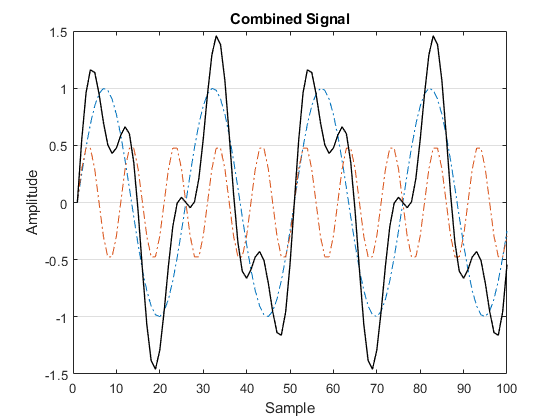

In [8]:
combine_signals(s1,s2);

s1 and s2 have different frequencies but have the same phase.

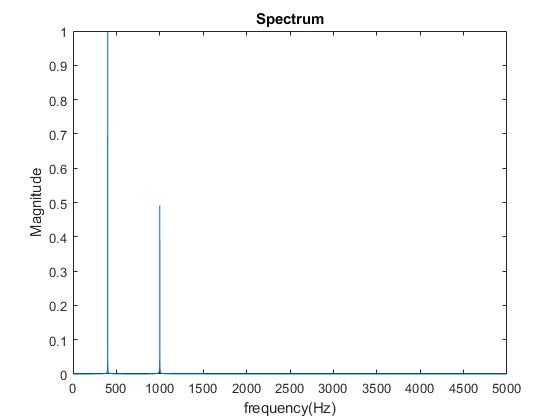

In [9]:
plot_spec(s1+s2,10000)

## Exercise 4: Two tones + noise

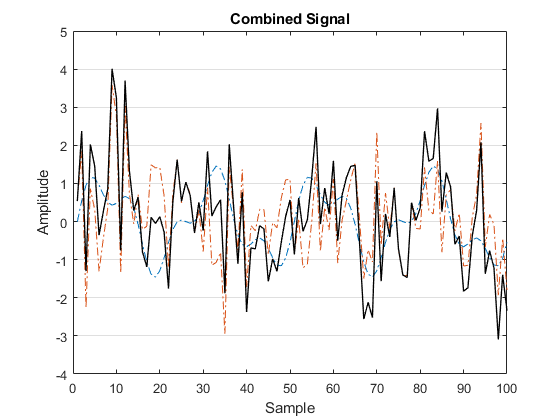

In [10]:
two_tone = s1 + s2;
noise_signal = randn(size(two_tone));
combine_signals(two_tone, noise_signal);

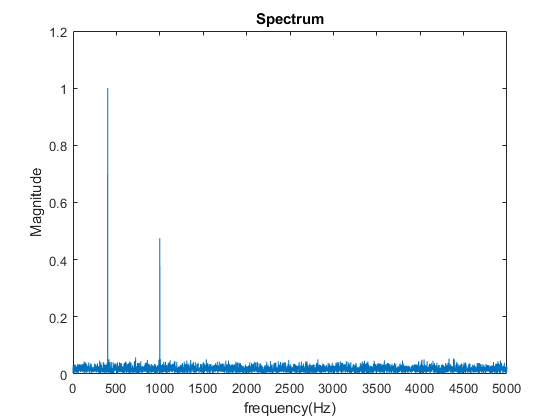

In [11]:
plot_spec(two_tone+noise_signal,10000)

Noise corrupts the time domain view of signals quite significantly however the spectrum of noise generally is fflat hence the noise energy is spread over the entire frequency range and the noise in the frequency view is very low and does not mask out the signal's mian frequency component


#### How does phase affect signals?
The phase of a signal simply changes the where a particular signal starts. Phase difference does affect the combined signal when you add two sognals together but phase has no nfluence on tsignal frequency hence the frequency spectrum will remain the same even if the phase of the signals have changed.

## Exercise 5: Projection using dot product

In [17]:
% dot product of s1 on s2
dot_product_12 = s1*s2'


dot_product_12 =

   1.7941e-13




In [12]:
s3 = sine_gen(1.0,401,10000,1); %sine wave of 401Hz

% dot product of s1 on s3
dot_product_13 = s1*s3'


dot_product_13 =

  -1.9691e-10




#### Orthogonality of projected signals
s1 is a 400Hz signal, s2 is a 1000Hz signal, while s3 is a 401Hz signal. The above scripts tell us that signals of different frequencies have nothing in common with other hence are all orthoganal i.e. their dot products are practiclally zero

In [20]:
% dot product of s1+s2 on s1
dot_product_121 = (s1+s2)*s1'


dot_product_121 =

   5.0000e+03




The combined signal s1+s2 is not orthogonal to s1 because they both have a common frequency component